In [9]:
from modules.ocrtran import TextDetectionOCR
ocr = TextDetectionOCR()
texts = ocr.extract_text_from_image('VF9.jpg')
print(texts)

ModuleNotFoundError: No module named 'craft'

In [1]:
from modules.yolo_detector import YOLODetector
detector = YOLODetector('static/models/best.pt')
result = detector.detect('1.jpg')
print(result)

📦 Loading YOLO model from static/models/best.pt...
✅ YOLO model loaded successfully
✅ YOLO detected: KIA (confidence: 0.45)
{'brand': 'KIA', 'confidence': 0.44915252923965454, 'box': [2868.289306640625, 1378.2073974609375, 3226.2216796875, 1632.753173828125]}


c:\Users\DELL\AppData\Local\Programs\Python\Python310\lib\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
c:\Users\DELL\AppData\Local\Programs\Python\Python310\lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=None`.
  warnings.warn(msg)
c:\Users\DELL\AppData\Local\Programs\Python\Python310\lib\site-packages\huggingface_hub\file_download.py:943: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(
Some weights of VisionEncoderDecoderModel were not initialized from the model checkpoint at microsoft/trocr-base

✅ Transformer OCR (TrOCR) khởi tạo thành công
✅ Hệ thống khởi tạo thành công!
🔍 Đang phát hiện vùng văn bản với CRAFT...
📊 Tìm thấy 3 vùng văn bản
  🔍 Xử lý vùng 1 - Kích thước: (146, 1227, 3)


c:\Users\DELL\AppData\Local\Programs\Python\Python310\lib\site-packages\transformers\generation\utils.py:1355: UserWarning: Using the model-agnostic default `max_length` (=20) to control the generation length. We recommend setting `max_new_tokens` to control the maximum length of the generation.
  warnings.warn(


  ✅ Vùng 1: 'VIN EASTS' (confidence: 0.90)
  🔍 Xử lý vùng 2 - Kích thước: (166, 475, 3)
  ✅ Vùng 2: 'VF9' (confidence: 0.90)
  🔍 Xử lý vùng 3 - Kích thước: (91, 232, 3)
  ✅ Vùng 3: 'VF9' (confidence: 0.90)


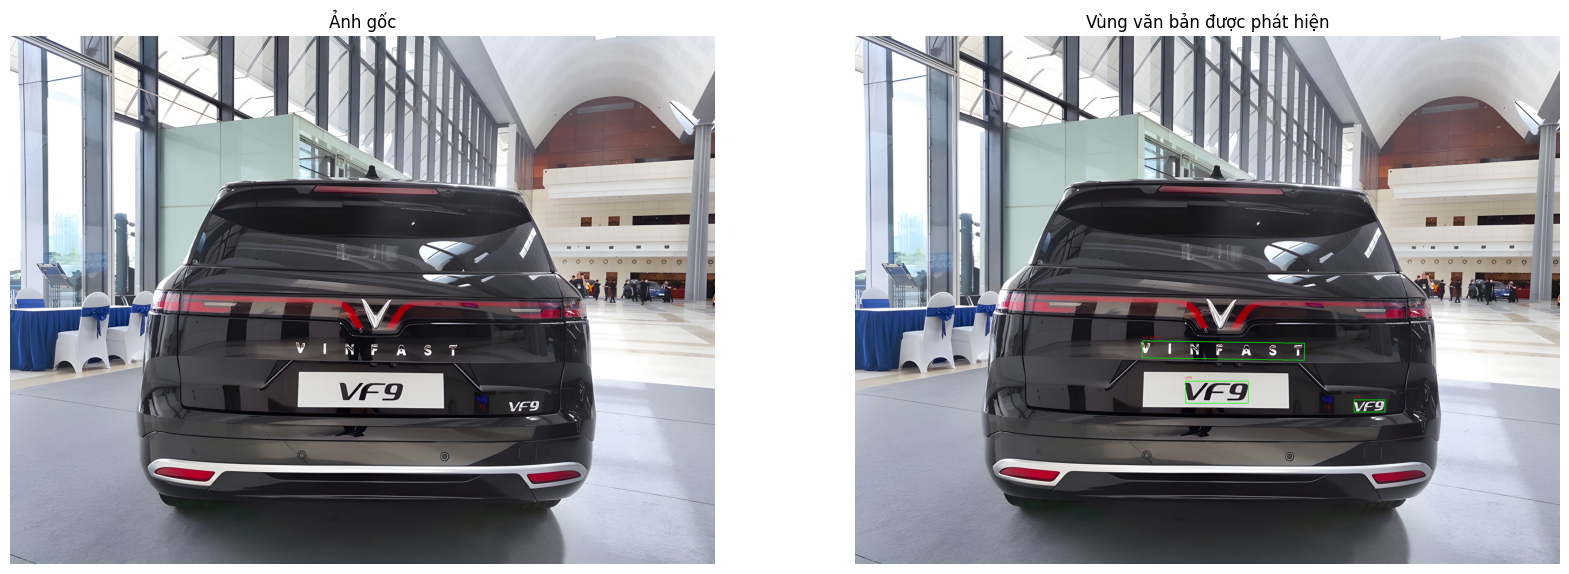

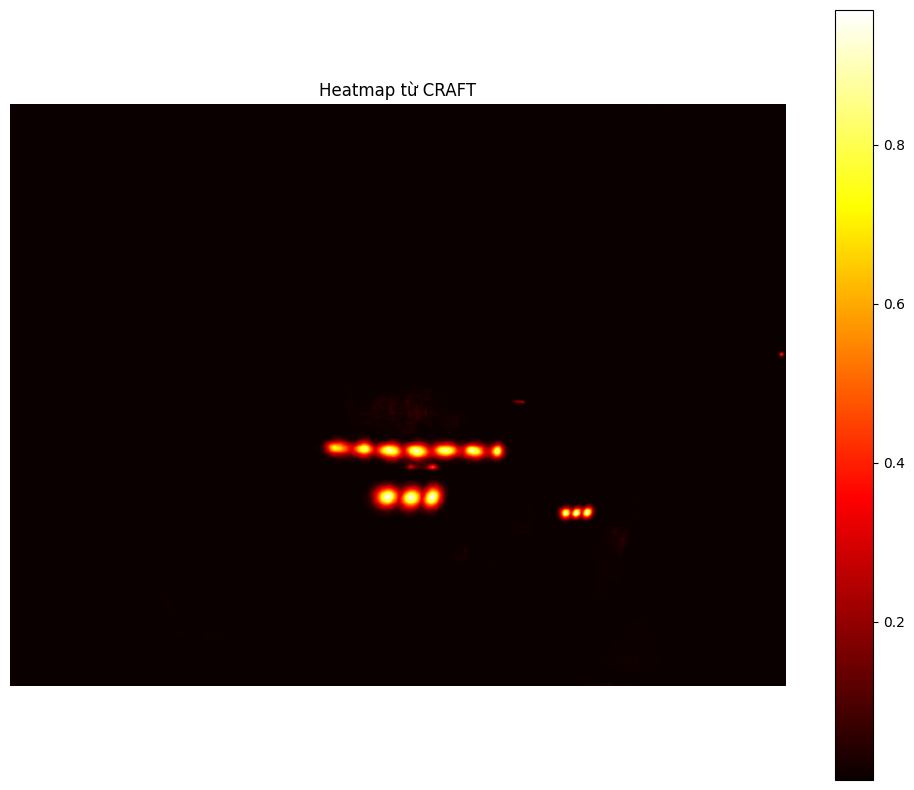


=== KẾT QUẢ NHẬN DẠNG VĂN BẢN ===
Vùng 1:
  Text: VIN EASTS
  Confidence: 0.9000
  Coordinates: {'x_min': 1058, 'y_min': 1358, 'x_max': 2285, 'y_max': 1504}
--------------------------------------------------
Vùng 2:
  Text: VF9
  Confidence: 0.9000
  Coordinates: {'x_min': 1405, 'y_min': 1537, 'x_max': 1880, 'y_max': 1703}
--------------------------------------------------
Vùng 3:
  Text: VF9
  Confidence: 0.9000
  Coordinates: {'x_min': 2219, 'y_min': 1637, 'x_max': 2451, 'y_max': 1728}
--------------------------------------------------
💾 Kết quả đã được lưu vào 'ocr_resultspaddle.txt'


In [10]:
import sys
sys.path.append('modules')

import importlib.util
spec = importlib.util.spec_from_file_location("paddleocr_module", r"modules\ocrtran.py")
paddleocr_module = importlib.util.module_from_spec(spec)
spec.loader.exec_module(paddleocr_module)

def main():
    # Khởi tạo hệ thống
    detector = paddleocr_module.TextDetectionOCR()  # ← ĐÃ CÓ DÒNG NÀY
    
    # Đường dẫn đến ảnh cần xử lý
    image_path = r"VF9.jpg"
    
    try:
        # Xử lý ảnh
        result = detector.process_image(image_path)  # ← DÙNG detector Ở ĐÂY
        
        if result:
            # Hiển thị kết quả - DÙNG detector Ở ĐÂY
            detector.visualize_results(result, save_path="result")
            
            # Lưu kết quả ra file text
            with open("ocr_resultspaddle.txt", "w", encoding="utf-8") as f:
                f.write("KẾT QUẢ NHẬN DẠNG VĂN BẢN\n")
                f.write("=" * 50 + "\n")
                for i, detection in enumerate(result['detections']):
                    f.write(f"Vùng {i+1}:\n")
                    f.write(f"  Text: {detection['text']}\n")
                    f.write(f"  Confidence: {detection['confidence']:.4f}\n")
                    f.write(f"  Coordinates: {detection['coordinates']}\n")
                    f.write("-" * 50 + "\n")
            
            print("💾 Kết quả đã được lưu vào 'ocr_resultspaddle.txt'")
        else:
            print("❌ Không thể xử lý ảnh")
        
    except Exception as e:
        print(f"❌ Lỗi: {e}")
        import traceback
        traceback.print_exc()

if __name__ == "__main__":
    main()